In [60]:
# # 초기 1회 실행
# from google.colab import drive
# drive.mount('/content/drive')

In [61]:
# 📥 데이터 다운로드 (Download Dataset)
# GitHub에서 csv 파일을 다운로드합니다.

!wget https://raw.githubusercontent.com/Dropthe-bit/ai_portfolio/main/data/wine.csv

--2025-06-24 13:41:41--  https://raw.githubusercontent.com/Dropthe-bit/ai_portfolio/main/data/wine.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12300 (12K) [text/plain]
Saving to: ‘wine.csv.1’

wine.csv.1          100%[===================>]  12.01K  --.-KB/s    in 0s      

2025-06-24 13:41:41 (100 MB/s) - ‘wine.csv.1’ saved [12300/12300]



# Machine_Learning1_comparison


In [62]:
## 필요 패키지 설치 및 import
import importlib.util
import subprocess
import sys
def install_and_import(packages):
    for pkg in packages:
        package = pkg
        try:
            importlib.util.find_spec(package)
            print(f"{package} is already installed.")
        except ImportError:
            # 모듈이 설치되어 있지 않은 경우 설치시도
            print(f"{package} is not installed. Installing...")
            subprocess.check_call([sys.executable, "-m", "pip", "install", package])
            subprocess.check_call(["conda", "install", package, "-y"])

            # 설치 후 다시 임포트를 시도
            importlib.import_module(package)
            print(f"{package} has been successfully installed.")

        # finally:
        #     globals()[package] = importlib.import_module(package)
        except Exception as e:
            # 설치 중 예외가 발생한 경우, 에러 메시지를 출력
            print(f"An error occurred while installing {package}: {str(e)}")

# 예시 사용법
install_and_import(['numpy', 'pandas', 'matplotlib', 'seaborn', 'scipy'])


numpy is already installed.
pandas is already installed.
matplotlib is already installed.
seaborn is already installed.
scipy is already installed.


In [63]:
## 필요 모듈 임포트
import os, sys, re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [64]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification

# 1. 혼동 행렬

## 간단 예제

In [65]:
## Example Generate actual and predicted labels
y_true = np.array([0,  1,   1, 1, 1, 0, 1, 0, 1, 0])
y_pred = np.array([0,  1,  1, 0, 1, 0, 1, 1, 0, 0] )

## Confusion matrix calculation
cm = confusion_matrix(y_true = y_true,
                                                 y_pred = y_pred)
print("Confusion matrix:")
print(cm)

Confusion matrix:
[[3 1]
 [2 4]]


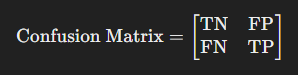

In [66]:
## 참고: 다른 혼동행렬 계산방법
cm = pd.crosstab(index = y_true, columns = y_pred)
# cm = pd.crosstab(columns = y_true, index = y_pred) # args에 따라 결과가 달라질 수 있음..주의!
cm # row_0

col_0,0,1
row_0,,
0,3,1
1,2,4


## 예시

In [67]:
from sklearn.metrics import confusion_matrix

## 예시 데이터 생성
np.random.seed(1234)  #
y_true = np.random.choice([0, 1],
                          size = 10000,
                          p = [0.7, 0.3])  # 70% 클래스 0, 30% 클래스 1
y_pred = np.random.choice([0, 1],
                          size = 10000,
                          p = [0.9, 0.1])  # 90% 클래스 0, 10% 클래스 1

## y_pred 클래스 수
pd.Series(y_pred).value_counts()

,count
0,8963
1,1037


In [68]:
## 혼동 행렬 계산
cm = confusion_matrix(y_true=y_true,
                                                 y_pred=y_pred)
print(cm)

[[6267  726]
 [2696  311]]


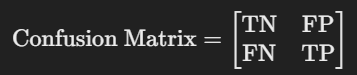

In [69]:
## 클래스 1을 기준으로 행과 열 순서 변경
cm = cm[::-1, ::-1]
print(cm)

[[ 311 2696]
 [ 726 6267]]


In [70]:
## 행과 열을 바꾸기 위해 전치(transpose)
cm_transposed = cm.T
print(cm_transposed)

[[ 311  726]
 [2696 6267]]


- 실습내 전치 행렬 결과
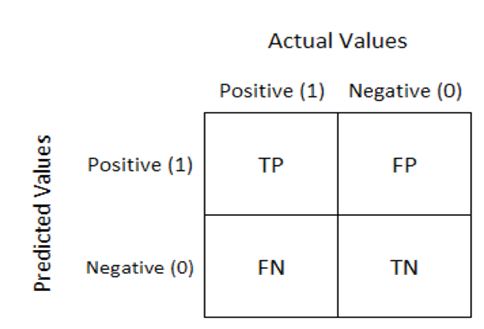

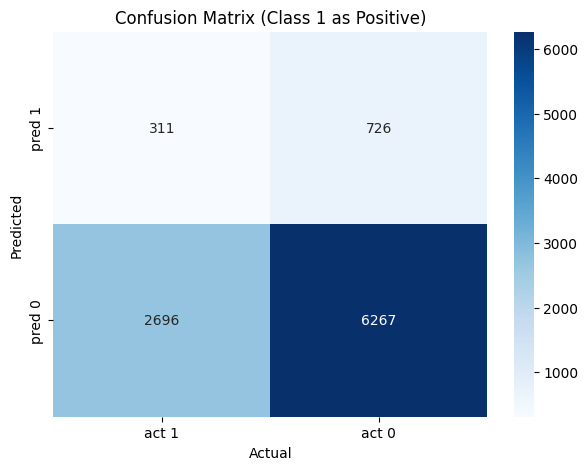

In [71]:
# DataFrame으로 변환 (라벨 추가)
df_cm = pd.DataFrame(cm_transposed,
                                                index = ['pred 1', 'pred 0'],
                                                columns = ['act 1', 'act 0'])

## 히트맵 그리기
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot = True, fmt = 'd', cmap = 'Blues')
plt.title('Confusion Matrix (Class 1 as Positive)')
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.show()

In [72]:
def custom_confusion_matrix(y_true, y_pred):

        ## 혼동 행렬 계산
        cm = confusion_matrix(y_true=y_true,
                                                         y_pred=y_pred)
        ## 클래스 1을 기준으로 행과 열 순서 변경
        cm = cm[::-1, ::-1]

        ## 행과 열을 바꾸기 위해 전치(transpose)
        cm_transposed = cm.T
        print(cm_transposed)


        # DataFrame으로 변환 (라벨 추가)
        df_cm = pd.DataFrame(cm_transposed,
                                                       index = ['pred 1', 'pred 0'],
                                                       columns = ['act 1', 'act 0'])

        ## 히트맵 그리기
        plt.figure(figsize = (7,5))
        sns.heatmap(df_cm, annot = True, fmt = 'd', cmap = 'Blues')
        plt.title('Confusion Matrix (Class 1 as Positive)')
        plt.ylabel('Predicted')
        plt.xlabel('Actual')
        plt.show()

In [73]:
# cm_transposed 값으로부터 직접 지표 계산
tp, fp, fn, tn = cm_transposed.ravel()
print(tp, fp)
print(fn, tn)

## 만약 transpose를 안하고 기본 방식을 따랐을 경우...
## tn, fn, fp, tp = cm.ravel()



311 726
2696 6267


## 지표 계산하기

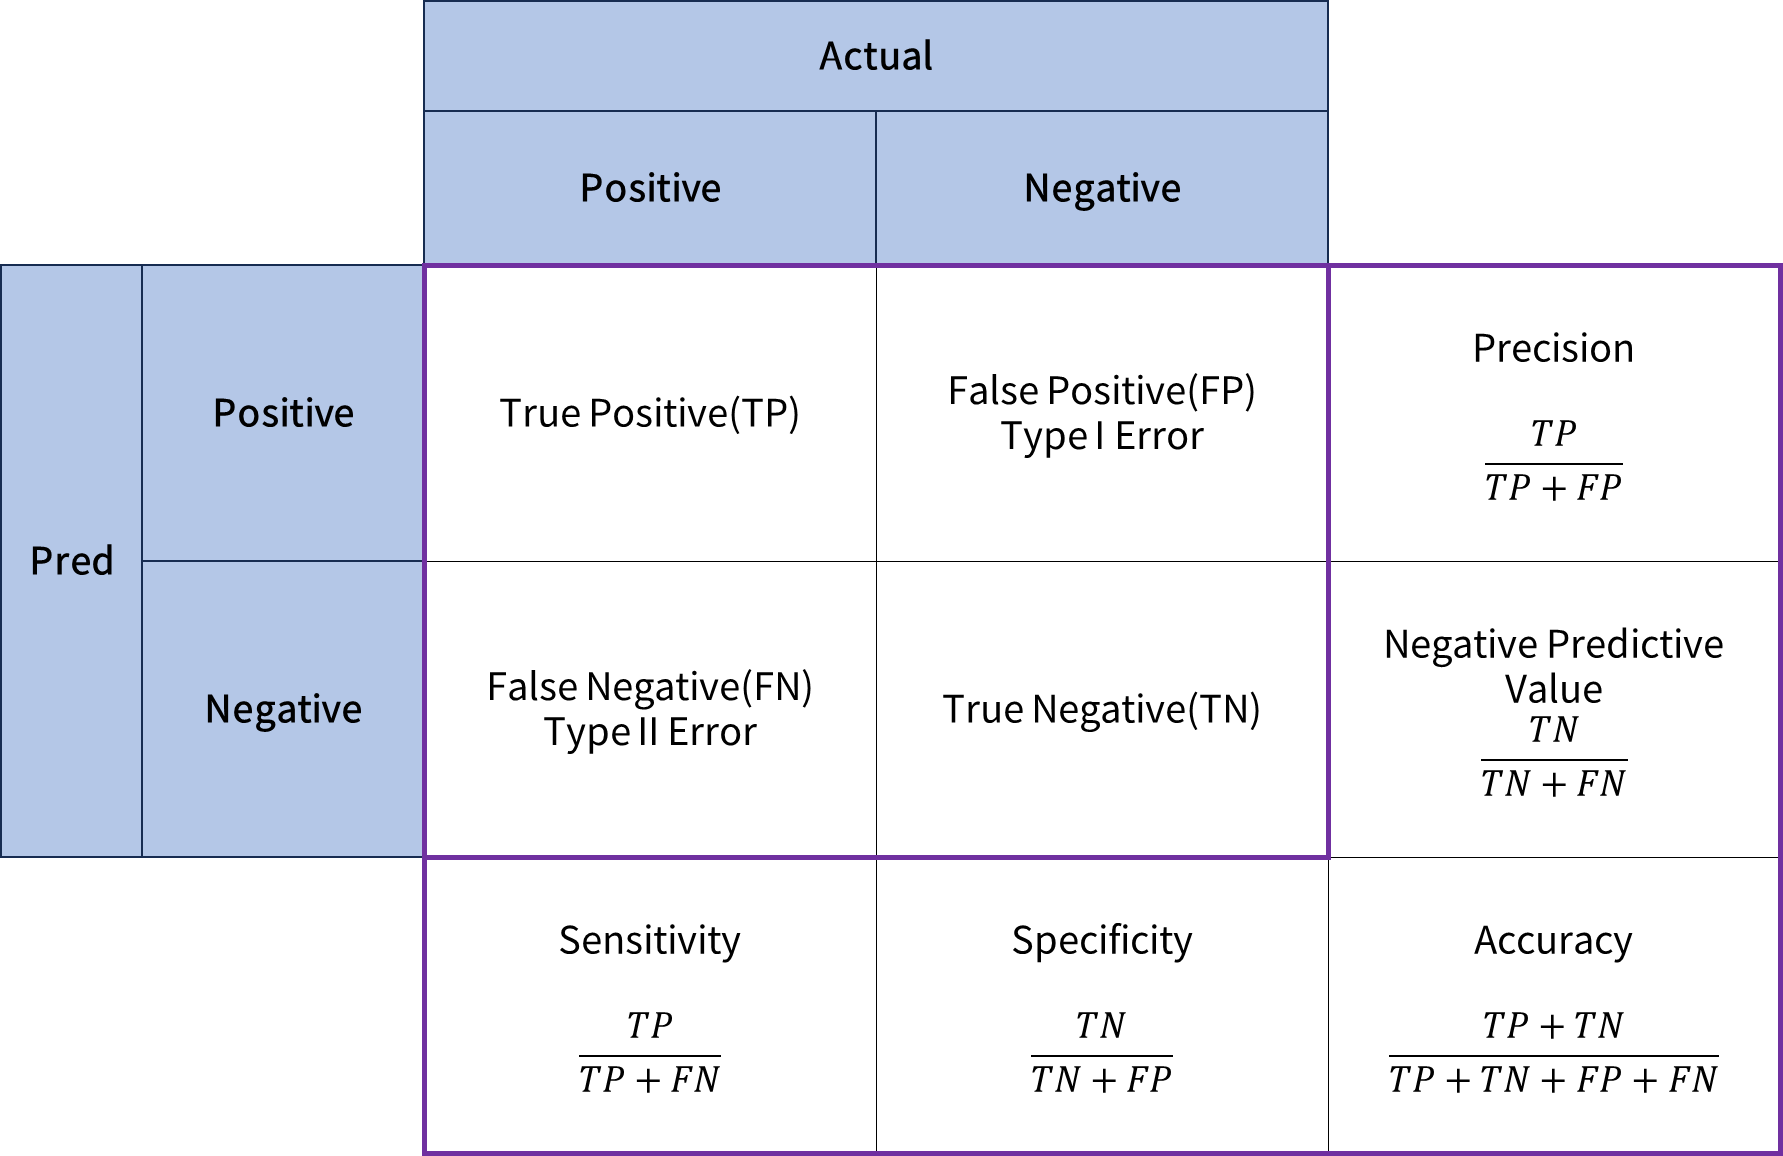

In [74]:
## 정확도 (Accuracy)
accuracy = (tp + tn) / (tp + tn + fp + fn)
accuracy

np.float64(0.6578)

In [75]:
## 오분류율 (Misclassification Rate, Error Rate) * 낮으면 좋음
misclassification_rate = (fp + fn) / (tp + tn + fp + fn)
misclassification_rate # 1- accuracy

np.float64(0.3422)

In [76]:
## 재현율 (Recall), 민감도(Sensitivity), True Positive Rate
## 실제 양성을 양성으로 바르게 예측한 비율
recall = tp / (tp + fn)
recall

np.float64(0.1034253408713003)

In [77]:
## 특이도 (Specificity)
## 실제 음성을 음성으로  바르게 예측한 비율
specificity = tn/ (tn + fp)
specificity

np.float64(0.8961818961818961)

In [78]:
## 정밀도 (Precision)
## 예측한 양성 중에서 실제 양성의 비율
precision = tp / (tp + fp)
precision


np.float64(0.29990356798457085)

In [79]:
## Negative Predicted Value
## 예측한 음성 중에서 실제 음성의 비율
npv = tn / (tn + fn)
npv


np.float64(0.6992078545129978)

In [80]:
## 거짓 양성 비율 (False Positive Rate) * 낮으면 좋음
## 실제 음성인데 양성으로 잘못 예측한 비율
fpr = fn / (tn + fn)
fpr


np.float64(0.3007921454870021)

In [81]:
## 거짓 음성 비율(False Negative Rate) * 낮으면 좋음
## 실제 양성인데 음성으로 잘못 예측한 비율
fnr = fp / (tp + fp)
fnr

np.float64(0.7000964320154291)

In [82]:
## 참고 F1 점수
f1_score = 2 * (precision * recall) / (precision + recall)
f1_score

np.float64(0.15380811078140455)

# ROC, AUC

In [83]:
# from sklearn.metrics import roc_curve, auc
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LogisticRegression
# from sklearn.datasets import make_classification

# 가상의 이진 분류 데이터셋 생성
X, y = make_classification(
                                              n_samples = 1000,  # 샘플 수
                                              n_classes = 2,     # 클래스 수 (이진 분류)
                                              weights = [0.7, 0.3],  # 각 클래스의 비율
                                              random_state = 123
                                              )

# 데이터를 훈련셋과 테스트셋으로 분할
X_train, X_test, y_train, y_test = train_test_split(
                                                                                          X,  # 특성 데이터
                                                                                          y,  # 레이블 데이터
                                                                                          test_size=0.3,  # 테스트셋의 비율
                                                                                         #  random_state = 123
                                                                                        )

# 로지스틱 회귀 모델 훈련
model = LogisticRegression()
model.fit(X_train, y_train)  # X_train: 훈련 특성, y_train: 훈련 레이블


# 테스트 데이터에 대한 예측 확률 계산
y_pred = model.predict_proba(X_test)  # X_test: 테스트 특성, 두 번째 열(클래스 1의 확률) 선택
pd.DataFrame(y_pred)

,0,1
0,0.999285,0.000715
1,0.615861,0.384139
2,0.017425,0.982575
3,0.024047,0.975953
4,0.040159,0.959841
...,...,...
295,0.000011,0.999989
296,0.962296,0.037704
297,0.999720,0.000280
298,0.882314,0.117686


In [84]:
# 테스트 데이터에 대한 예측 확률 계산
y_pred_proba = model.predict_proba(X_test)[:, 1]  # X_test: 테스트 특성, 두 번째 열(클래스 1의 확률) 선택
pd.DataFrame(y_pred_proba)

,0
0,0.000715
1,0.384139
2,0.982575
3,0.975953
4,0.959841
...,...
295,0.999989
296,0.037704
297,0.000280
298,0.117686


## ROC curve

In [85]:
## ROC 곡선 계산
fpr, tpr, thresholds = roc_curve(
                                         y_true = y_test,      # 실제 레이블
                                         y_score=  y_pred_proba  # 예측 확률
                                          )
fpr, tpr, thresholds # 1-Specificity, Sensitivity,

(array([0.        , 0.        , 0.        , 0.00460829, 0.00460829,
        0.00921659, 0.00921659, 0.01843318, 0.01843318, 0.03686636,
        0.03686636, 0.05069124, 0.05069124, 0.05990783, 0.05990783,
        0.12442396, 0.12442396, 1.        ]),
 array([0.        , 0.01204819, 0.10843373, 0.10843373, 0.72289157,
        0.72289157, 0.91566265, 0.91566265, 0.92771084, 0.92771084,
        0.95180723, 0.95180723, 0.97590361, 0.97590361, 0.98795181,
        0.98795181, 1.        , 1.        ]),
 array([           inf, 9.99992195e-01, 9.99446078e-01, 9.99320657e-01,
        9.22178162e-01, 9.20487574e-01, 5.79338000e-01, 5.34985591e-01,
        5.04117756e-01, 4.10689151e-01, 3.86391802e-01, 3.26572115e-01,
        3.05694120e-01, 2.81090319e-01, 2.41584734e-01, 1.38174411e-01,
        1.28512021e-01, 3.58689425e-06]))

## AUC

In [86]:
## AUC (Area Under the Curve) 계산
roc_auc = auc(fpr,  tpr)  # fpr: 거짓 양성 비율, tpr: 참 양성 비율
roc_auc

np.float64(0.990838931763922)

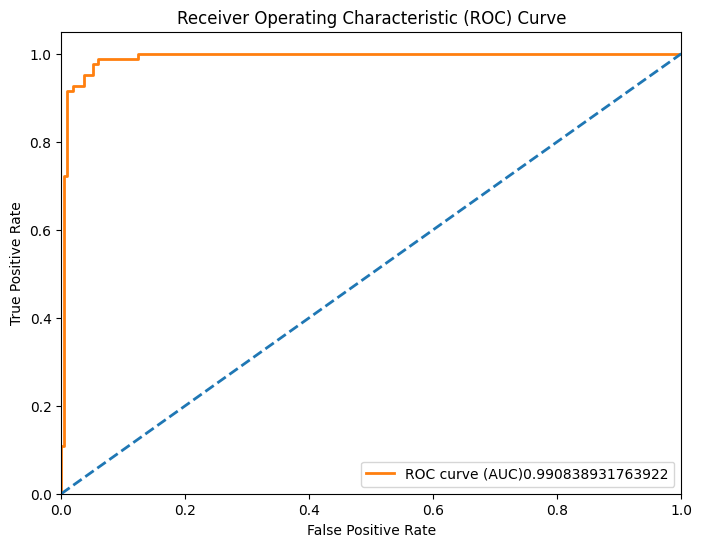

In [87]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color = 'C1', lw = 2, label =  'ROC curve (AUC)' + str(roc_auc))
plt.plot([0, 1], [0, 1], color = 'C0', lw = 2, linestyle = '--')
plt.xlim([0.0, 1.0])  # x축 범위
plt.ylim([0.0, 1.05])  # y축 범위
plt.xlabel('False Positive Rate')  # x축 레이블
plt.ylabel('True Positive Rate')  # y축 레이블
plt.title('Receiver Operating Characteristic (ROC) Curve')  # 그래프 제목
plt.legend(loc="best")  # 범례 위치
plt.show()


In [88]:
## 참고: 임계값에 대한 FPR과 TPR 출력
print("임계값에 따른 FPR과 TPR:")
for i in range(0, len(thresholds), len(thresholds)//5):
    print(f"Threshold: {thresholds[i]:.2f}, FPR: {fpr[i]:.2f}, TPR: {tpr[i]:.2f}")

임계값에 따른 FPR과 TPR:
Threshold: inf, FPR: 0.00, TPR: 0.00
Threshold: 1.00, FPR: 0.00, TPR: 0.11
Threshold: 0.58, FPR: 0.01, TPR: 0.92
Threshold: 0.41, FPR: 0.04, TPR: 0.93
Threshold: 0.31, FPR: 0.05, TPR: 0.98
Threshold: 0.14, FPR: 0.12, TPR: 0.99


# 변수 표준화, 정규화

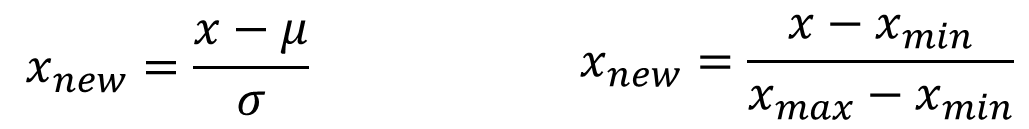

In [89]:
rd = pd.read_csv('wine.csv')
rd

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline,Class
0,13.34,0.94,2.36,17.0,110,2.53,1.30,0.55,0.42,3.17,1.02,1.93,750,Wine B
1,13.52,3.17,2.72,23.5,97,1.55,0.52,0.50,0.55,4.35,0.89,2.06,520,Wine C
2,13.24,3.98,2.29,17.5,103,2.64,2.63,0.32,1.66,4.36,0.82,3.00,680,Wine A
3,11.64,2.06,2.46,21.6,84,1.95,1.69,0.48,1.35,2.80,1.00,2.75,680,Wine B
4,13.36,2.56,2.35,20.0,89,1.40,0.50,0.37,0.64,5.60,0.70,2.47,780,Wine C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171,14.06,1.63,2.28,16.0,126,3.00,3.17,0.24,2.10,5.65,1.09,3.71,780,Wine A
172,11.66,1.88,1.92,16.0,97,1.61,1.57,0.34,1.15,3.80,1.23,2.14,428,Wine B
173,12.93,2.81,2.70,21.0,96,1.54,0.50,0.53,0.75,4.60,0.77,2.31,600,Wine C
174,13.32,3.24,2.38,21.5,92,1.93,0.76,0.45,1.25,8.42,0.55,1.62,650,Wine C


In [90]:
rd.columns

Index(['Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium',
       'Total phenols', 'Flavanoids', 'Nonflavanoid phenols',
       'Proanthocyanins', 'Color intensity', 'Hue',
       'OD280/OD315 of diluted wines', 'Proline', 'Class'],
      dtype='object')

In [91]:
df = rd[['Alcohol', 'Malic acid', 'Magnesium', 'Color intensity']]
df
df.describe()


,Alcohol,Malic acid,Magnesium,Color intensity
count,176.000000,176.00000,176.000000,176.000000
mean,12.999091,2.32875,99.698864,5.068750
std,0.807888,1.11263,14.136688,2.323638
min,11.030000,0.74000,70.000000,1.280000
25%,12.367500,1.59750,88.000000,3.240000
50%,13.050000,1.86500,98.000000,4.690000
75%,13.672500,3.04750,107.000000,6.212500
max,14.830000,5.80000,162.000000,13.000000


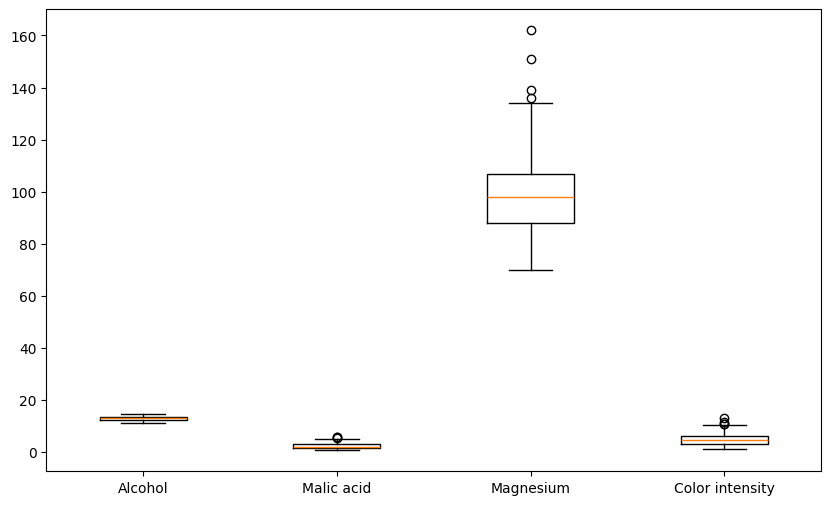

In [92]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.boxplot(df)
ax.set_xticklabels(df.columns)
plt.show()

## 표준화

In [93]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

## 표준화 (Standardization)
scaler = StandardScaler()

df_standardized = scaler.fit_transform(df)
df_standardized = pd.DataFrame(df_standardized,
                                                                      columns = df.columns)
df_standardized

,Alcohol,Malic acid,Magnesium,Color intensity
0,0.423180,-1.251730,0.730760,-0.819477
1,0.646619,0.758249,-0.191457,-0.310203
2,0.299047,1.488331,0.234182,-0.305888
3,-1.687077,-0.242234,-1.113673,-0.979164
4,0.448006,0.208434,-0.758975,0.229281
...,...,...,...,...
171,1.316935,-0.629808,1.865796,0.250860
172,-1.662250,-0.404474,-0.191457,-0.547577
173,-0.085764,0.433768,-0.262396,-0.202307
174,0.398353,0.821342,-0.546155,1.446357


In [94]:
## 각 변수의 평균과 표준편차 계산
# means = df_standardized.mean()
# stds = df_standardized.std()
# means, stds

df_standardized.describe()

,Alcohol,Malic acid,Magnesium,Color intensity
count,1.760000e+02,1.760000e+02,1.760000e+02,1.760000e+02
mean,-1.049665e-15,1.198536e-16,-2.775558e-16,-8.074349e-17
std,1.002853e+00,1.002853e+00,1.002853e+00,1.002853e+00
min,-2.444286e+00,-1.431997e+00,-2.106830e+00,-1.635177e+00
25%,-7.840110e-01,-6.591019e-01,-8.299144e-01,-7.892655e-01
50%,6.319484e-02,-4.179945e-01,-1.205170e-01,-1.634637e-01
75%,8.359211e-01,6.478352e-01,5.179408e-01,4.936281e-01
max,2.272757e+00,3.128762e+00,4.419627e+00,3.423028e+00


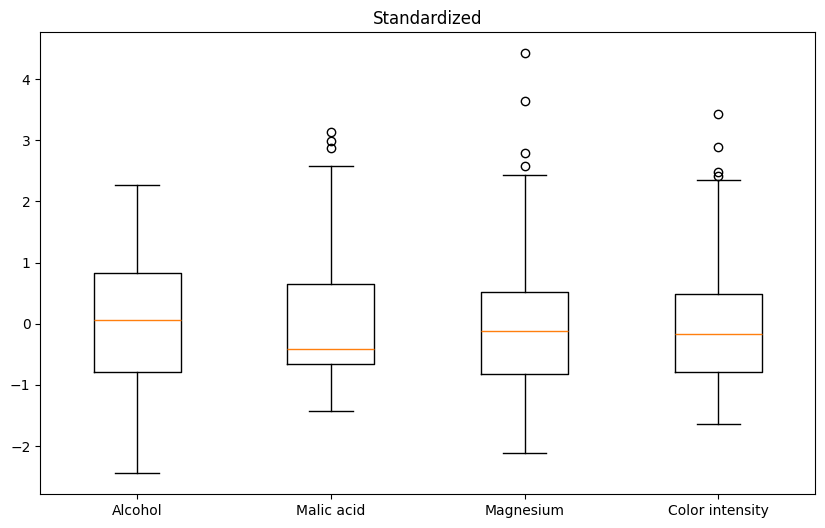

In [95]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.boxplot(df_standardized)
ax.set_title("Standardized")
ax.set_xticklabels(df.columns)
plt.show()


## 정규화

In [96]:
# from sklearn.preprocessing import MinMaxScaler
## 정규화 (Normalization)
normalizer = MinMaxScaler()

df_normalized = normalizer.fit_transform(df)
df_normalized = pd.DataFrame(df_normalized,
                                                                 columns = [df.columns])
df_normalized

,Alcohol,Malic acid,Magnesium,Color intensity
0,0.607895,0.039526,0.434783,0.161263
1,0.655263,0.480237,0.293478,0.261945
2,0.581579,0.640316,0.358696,0.262799
3,0.160526,0.260870,0.152174,0.129693
4,0.613158,0.359684,0.206522,0.368601
...,...,...,...,...
171,0.797368,0.175889,0.608696,0.372867
172,0.165789,0.225296,0.293478,0.215017
173,0.500000,0.409091,0.282609,0.283276
174,0.602632,0.494071,0.239130,0.609215


In [97]:
## 각 변수의 평균과 표준편차 계산
# means = df_normalized.mean()
# stds = df_normalized.std()
# means, stds

df_normalized.describe()

,Alcohol,Malic acid,Magnesium,Color intensity
count,176.000000,176.000000,176.000000,176.000000
mean,0.518182,0.313982,0.322814,0.323272
std,0.212602,0.219887,0.153660,0.198263
min,0.000000,0.000000,0.000000,0.000000
25%,0.351974,0.169466,0.195652,0.167235
50%,0.531579,0.222332,0.304348,0.290956
75%,0.695395,0.456028,0.402174,0.420862
max,1.000000,1.000000,1.000000,1.000000


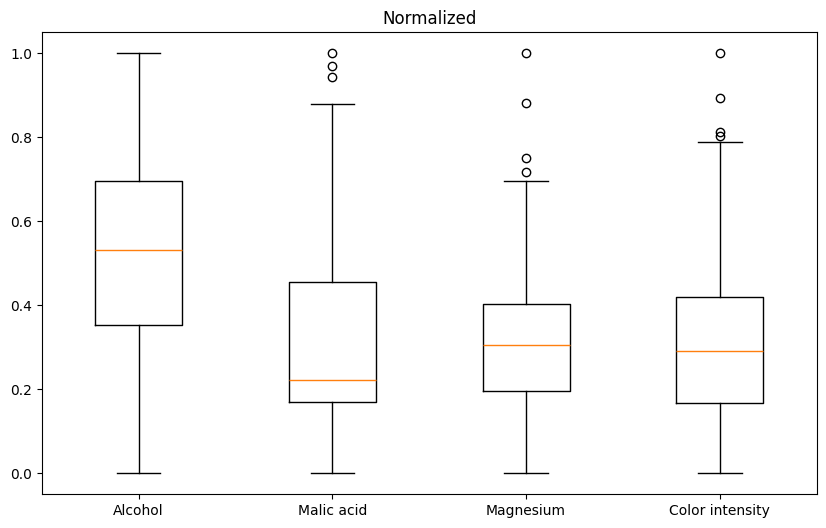

In [98]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.boxplot(df_normalized)
ax.set_title("Normalized")
ax.set_xticklabels(df.columns)
plt.show()


## 표준화 정규화 비교

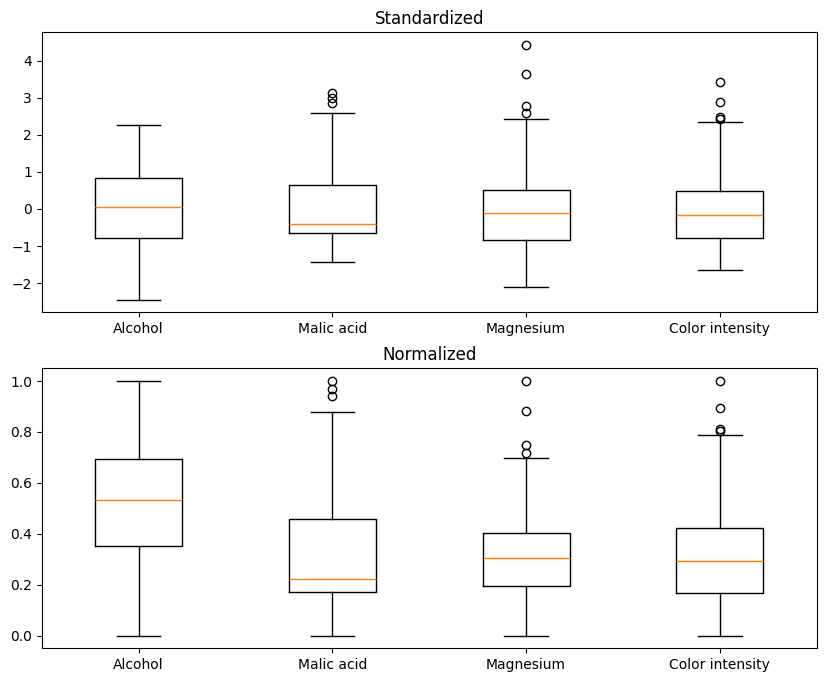

In [99]:
fig, ax = plt.subplots(2, 1, figsize=(10, 8))
ax[0].boxplot(df_standardized)
ax[0].set_title("Standardized")
ax[0].set_xticklabels(df.columns)

ax[1].boxplot(df_normalized)
ax[1].set_title("Normalized")
ax[1].set_xticklabels(df.columns)
plt.show()


## EOS